In [1]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as  plt
import seaborn as sns
import os
import glob   

ModuleNotFoundError: No module named 'pandas'

In [2]:
net_list = []
with open("networks_analysis_B/task.list", 'r') as task_f:   #open pdbs found in this folder
    for line in task_f:
        line = line.strip()
        net_list.append(line)
    #import the pdbs into the notebook, one at a time

In [ ]:
dsc = pd.read_csv("networks_analysis_B/score.sc", sep='\s+', header=1)
dsc["description"] = dsc["description"].str[:-5]

In [3]:
dY = pd.DataFrame()
for item in net_list:
    description = item
    pdb_file = "networks_analysis_B/" + item + ".pdb"   #change this to the folder where the pdbs are found
    score = {}
#    labels = []
    pose_energy = []
    hbnet = []
    hbnet_pdb = "networks_analysis_B/" + item + "/" + item + "_0001.pdb"
    if os.path.isfile(hbnet_pdb):
#        with open(pdb_file, 'r') as score_f:
#            for line in score_f:
#                if line.startswith("#BEGIN_POSE_ENERGIES_TABLE"):
#                    break
#            for line in score_f:
#                if line.startswith("label"):
#                    labels = line.strip().split(' ')
#                elif line.startswith("pose"):
#                    pose_energy = line.strip().split(' ')
#                    for i in range(1, len(labels)):
#                        score[labels[i]] = float(pose_energy[i])
#                    break
#                    labels = next(score_f).strip().split(' ')
#                    next(score_f)
#                    pose_energy = score_f.readline().strip().split(' ')
#                    for i in range(1, len(labels)):
#                        score[labels[i]] = float(pose_energy[i])
#                    for line in score_f:
#                        if "pore" in line:
#                            score['sasa'] = float(line.split(" ")[1])
#                        elif "gly_holes_atm" in line:
#                            score['gly_holes_atm'] = float(line.split(" ")[1])
#                        elif "gly_holes_res" in line:
#                            score['gly_holes_res'] = float(line.split(" ")[1])
#                        elif "sc_buns_hbnetA" in line:
#                            score['sc_heavy_unsat'] = float(line.split(" ")[1])
#                        elif "network_holes_atm" in line:
#                            score['network_holes_atm'] = float(line.split(" ")[1])
#                        elif "network_holes_res" in line:
#                            score['network_holes_res'] = float(line.split(" ")[1])
        score["description"] = description
        with open(hbnet_pdb, 'r') as hbnet_f:
            for line in hbnet_f:
                if "REMARK PDBinfo-LABEL:" in line and " HBNet" in line:
                    hbnet_res = int(line[21:26])
                    hbnet.append(hbnet_res)
        score["hbnet"] = hbnet
        score["n_hbnet"] = len(hbnet)      #specify on what position the tyrosine resiudes are
        if 10 in score["hbnet"]:           #in this case there should be three 
            score["hbnet_tyr10"] = True    
        else:
            score["hbnet_tyr10"] = False
        if 96 in score["hbnet"]:
            score["hbnet_tyr96"] = True     #this also imports the metrics table at the end of the pdb file
        else:                                #this specifies the number of hb_net found in the structure
            score["hbnet_tyr96"] = False
        dY = dY.append(score, ignore_index=True)
    else:
        print(pdb_file)
print(dY)

networks_analysis_B/0_input_0088_0001_10_0004_0004.pdb
networks_analysis_B/0_input_0088_0001_11_0009_0008_0005.pdb
networks_analysis_B/0_input_0088_0001_6_0002_0001_0003.pdb
networks_analysis_B/0_input_0088_0001_6_0002_0001_0006.pdb
networks_analysis_B/0_input_0088_0001_6_0002_0001_0008.pdb
networks_analysis_B/0_input_0088_0001_6_0002_0001_0009.pdb
networks_analysis_B/0_input_0088_0001_6_0002_0001_0010.pdb
networks_analysis_B/0_input_0088_0001_6_0002_0001.pdb
networks_analysis_B/0_input_0088_0001_6_0010_0010_0001.pdb
networks_analysis_B/0_input_0088_0001_7_0008_0009.pdb
networks_analysis_B/0_input_0088_0003_23_0009_0006_0002.pdb
networks_analysis_B/100_input_0084_0003_23_0005_0009_0004.pdb
networks_analysis_B/100_input_0084_0003_23_0005_0009_0007.pdb
networks_analysis_B/100_input_0084_0003_23_0005_0009_0008.pdb
networks_analysis_B/100_input_0084_0003_23_0005_0009_0009.pdb
networks_analysis_B/101_input_0083_0002_13_0001_0010_0001.pdb
networks_analysis_B/101_input_0083_0002_13_0001_0010_

In [4]:
dsc["hbnet_tyrs"] = dsc["hbnet_tyr10"] + dsc["hbnet_tyr96"]

In [5]:
dsc.to_pickle('scores.pickle')

In [3]:
dsc = pd.read_pickle('scores.pickle')

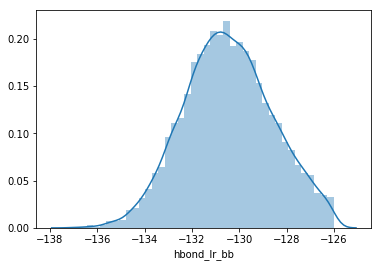

In [9]:
sns.distplot(dsc["hbond_lr_bb"], bins=40)    #display the hbond_lr_bb metrics

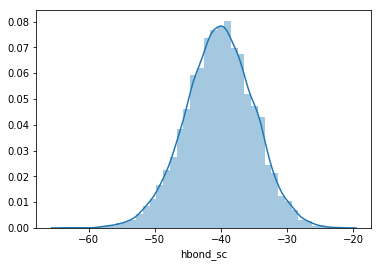

In [10]:
sns.distplot(dsc["hbond_sc"], bins=40)    #display the hbond_sc metrics

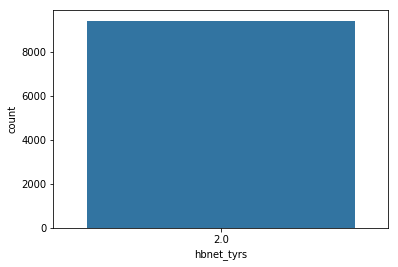

In [14]:
sns.countplot(dsc["hbnet_tyrs"])

In [16]:
dsc_complete = dsc.loc[dsc["hbnet_tyrs"] == 2]    #make sure that there are 2 tyrosines making the network
dsc_complete

,angle_constraint,atom_pair_constraint,description,dihedral_constraint,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,...,lk_ball_wtd,n_hbnet,omega,p_aa_pp,pro_close,rama_prepro,ref,total,yhh_planarity,hbnet_tyrs
0,0.0,0.00000,0_input_0011_0002_7_0004_0010_0001,0.85676,0.0,-978.999,202.532,-681.107,2.11828,29.1670,...,10.47130,16.0,18.9118,-65.5041,1.14697,3.72323,41.6618,-919.195,0.73344,2.0
1,0.0,0.00000,0_input_0011_0002_7_0004_0010_0003,0.98825,0.0,-953.800,196.638,-671.346,2.09399,28.0307,...,12.19610,18.0,18.5063,-65.1312,1.16406,2.62923,34.0288,-913.007,0.46475,2.0
2,0.0,0.00000,0_input_0011_0002_7_0004_0010_0005,1.59577,0.0,-944.250,196.679,-685.496,2.03124,27.7381,...,11.20520,15.0,18.4169,-65.7579,1.04352,1.86965,25.2433,-922.638,0.35003,2.0
3,0.0,0.00000,0_input_0011_0002_7_0004_0010_0006,1.20358,0.0,-980.777,198.074,-669.949,2.13610,30.4390,...,12.72260,23.0,18.3079,-67.2383,1.21596,3.08230,44.4747,-916.155,0.19615,2.0
4,0.0,0.00000,0_input_0011_0002_7_0004_0010_0007,1.52170,0.0,-946.596,183.444,-652.580,2.08187,27.3380,...,11.60650,10.0,19.1440,-67.7780,1.06689,2.17425,47.4239,-909.391,0.21354,2.0
5,0.0,0.00000,0_input_0011_0002_7_0004_0010_0008,1.16642,0.0,-963.083,203.827,-677.534,2.10074,29.1460,...,14.40000,23.0,19.0065,-64.5607,1.20348,3.12820,29.3835,-913.534,0.18058,2.0
6,0.0,0.00000,0_input_0011_0002_7_0004_0010_0009,0.75016,0.0,-954.311,196.562,-672.436,2.05861,29.5470,...,8.98710,15.0,18.8890,-64.4174,1.20821,3.30611,29.0989,-913.252,0.90502,2.0
7,0.0,0.00000,0_input_0011_0002_7_0004_0010_0010,0.76080,0.0,-961.326,190.354,-661.975,2.09008,29.2638,...,10.01810,23.0,19.3328,-66.1708,1.17016,3.43273,39.1806,-917.053,0.98657,2.0
8,NaN,NaN,0_input_0011_0002_7_0004_0010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
9,0.0,0.00000,0_input_0011_0005_10_0001_0003_0010,0.45193,0.0,-934.009,192.984,-659.205,1.99520,26.7461,...,9.37543,10.0,17.6183,-64.4305,1.16278,-2.00586,27.0722,-920.606,0.47759,2.0


In [6]:
dhbnet = pd.DataFrame()
for item in net_list:
    for file in glob.glob("networks_analysis_B/"+item+"/*_nativenetwork_*.pdb"):
        net_score = {}
        net_res = []
        cst_file = file.replace('nativenetwork', 'native_network')
        cst_file = cst_file.replace('pdb', 'cst')
        cst = ""
        n_hbonds = 0
        net_score["net_tyr10"] = False
        net_score["net_tyr96"] = False
        with open(file, 'r') as in_net:
            for line in in_net:
                if "ATOM " in line:
                    res_num = int(line.split()[5])
                    res_name = line.split()[3]
                    if res_name not in ["ALA","GLY","PRO"] and res_num not in net_res:
                        net_res.append(res_num)
                    if res_name == "TYR" and res_num == 10:
                        net_score["net_tyr10"] = True
                    elif res_name == "TYR" and res_num == 96:
                        net_score["net_tyr96"] = True
                elif "HBNet_NumUnsatHpol" in line:
                    net_score["HBNet_NumUnsatHpol"] = float(line.split(" ")[1])
                elif "HBNet_Saturation" in line:   #imports the HBNet_saturation from the cst file
                    net_score["HBNet_saturation"] = float(line.split(" ")[1])
                elif "HBNet_Score" in line:  #imports the HBNet_score from the cst file
                    net_score["HBNet_Score"] = float(line.split(" ")[1])
        with open(cst_file, 'r') as cst_i:
            for line in cst_i:
                if "AtomPair" in line:
                    cst += line[1:]
                    n_hbonds += 1
                else:
                    cst += line
        net_score["description"] = item
        net_score["network"] = net_res
        net_score["n_res_network"] = len(net_res)
        net_score["network_cst"] = cst
        net_score["n_hbonds"] = n_hbonds
#        if 10 in net_score["network"]:
#            net_score["net_tyr10"] = True
#        else:
#            net_score["net_tyr10"] = False
#        if 68 in net_score["network"]:
#            net_score["net_tyr68"] = True
#        else:
#            net_score["net_tyr68"] = False
        dhbnet = dhbnet.append(net_score, ignore_index=True)
print(dhbnet)

       HBNet_NumUnsatHpol  HBNet_Score  HBNet_saturation  \
0                     0.0     -2.15998          0.526316   
1                     0.0     -2.49999          0.300000   
2                     0.0     -2.53872          0.428571   
3                     0.0     -2.31286          0.555556   
4                     0.0     -2.57740          0.300000   
5                     0.0     -2.61451          0.461538   
6                     0.0     -2.18209          0.526316   
7                     0.0     -2.78833          0.500000   
8                     0.0     -2.55562          0.428571   
9                     0.0     -2.94124          0.300000   
10                    0.0     -3.49061          0.750000   
11                    0.0     -2.31526          0.400000   
12                    0.0     -2.34160          0.428571   
13                    0.0     -3.55504          0.666667   
14                    0.0     -2.19899          0.526316   
15                    0.0     -3.02287  

In [7]:
dhbnet["tyrs"] = dhbnet["net_tyr10"] + dhbnet["net_tyr96"]
dhbnet["saturation"] = dhbnet["n_hbonds"]/dhbnet["n_res_network"]
print(dhbnet)

       HBNet_NumUnsatHpol  HBNet_Score  HBNet_saturation  \
0                     0.0     -2.15998          0.526316   
1                     0.0     -2.49999          0.300000   
2                     0.0     -2.53872          0.428571   
3                     0.0     -2.31286          0.555556   
4                     0.0     -2.57740          0.300000   
5                     0.0     -2.61451          0.461538   
6                     0.0     -2.18209          0.526316   
7                     0.0     -2.78833          0.500000   
8                     0.0     -2.55562          0.428571   
9                     0.0     -2.94124          0.300000   
10                    0.0     -3.49061          0.750000   
11                    0.0     -2.31526          0.400000   
12                    0.0     -2.34160          0.428571   
13                    0.0     -3.55504          0.666667   
14                    0.0     -2.19899          0.526316   
15                    0.0     -3.02287  

In [8]:
dhbnet.to_pickle('networks.pickle')

In [4]:
dhbnet = pd.read_pickle('networks.pickle')

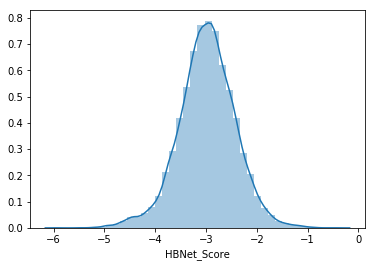

In [17]:
# select based on the quality of the network: good hbond_sc, n_hbonds, presence of 10 or 68, good network energy.
sns.distplot(dhbnet["HBNet_Score"], bins=40)

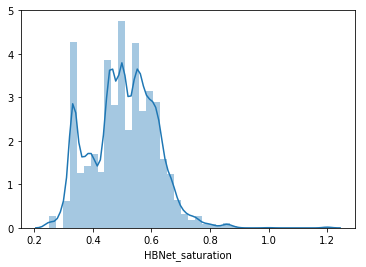

In [18]:
sns.distplot(dhbnet["HBNet_saturation"], bins=40)   #all of the below are graphs represeting the imported data from the metrics

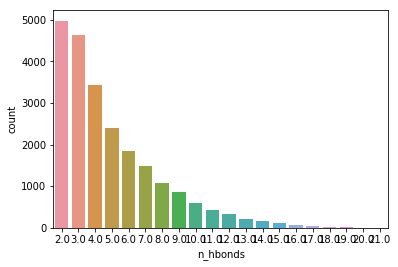

In [19]:
sns.countplot(dhbnet["n_hbonds"])

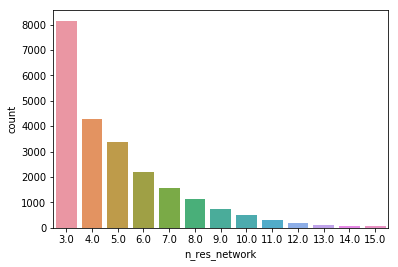

In [20]:
sns.countplot(dhbnet["n_res_network"])

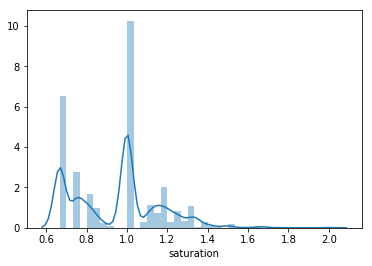

In [21]:
sns.distplot(dhbnet["saturation"], bins=40)

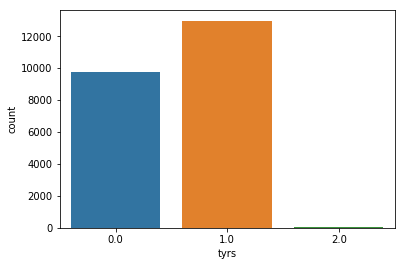

In [22]:
sns.countplot(dhbnet["tyrs"])

In [23]:
dhbnet_tyrs = dhbnet.loc[(dhbnet["net_tyr10"] == True) | (dhbnet["net_tyr96"] == True) ]
dhbnet_tyrs

,HBNet_NumUnsatHpol,HBNet_Score,HBNet_saturation,description,n_hbonds,n_res_network,net_tyr10,net_tyr96,network,network_cst,tyrs,saturation
0,0.0,-2.15998,0.526316,0_input_0011_0002_7_0004_0010_0001,5.0,5.0,0.0,1.0,"[96, 118, 126, 128, 130]",# 0_input_0011_0002_7_0004_0010_0001_0001_nati...,1.0,1.000000
1,0.0,-2.49999,0.300000,0_input_0011_0002_7_0004_0010_0001,2.0,3.0,1.0,0.0,"[10, 28, 38]",# 0_input_0011_0002_7_0004_0010_0001_0001_nati...,1.0,0.666667
4,0.0,-2.57740,0.300000,0_input_0011_0002_7_0004_0010_0003,2.0,3.0,1.0,0.0,"[10, 28, 38]",# 0_input_0011_0002_7_0004_0010_0003_0001_nati...,1.0,0.666667
6,0.0,-2.18209,0.526316,0_input_0011_0002_7_0004_0010_0003,5.0,5.0,0.0,1.0,"[96, 118, 126, 128, 130]",# 0_input_0011_0002_7_0004_0010_0003_0001_nati...,1.0,1.000000
9,0.0,-2.94124,0.300000,0_input_0011_0002_7_0004_0010_0005,2.0,3.0,1.0,0.0,"[10, 28, 38]",# 0_input_0011_0002_7_0004_0010_0005_0001_nati...,1.0,0.666667
11,0.0,-2.31526,0.400000,0_input_0011_0002_7_0004_0010_0005,2.0,3.0,0.0,1.0,"[96, 128, 130]",# 0_input_0011_0002_7_0004_0010_0005_0001_nati...,1.0,0.666667
14,0.0,-2.19899,0.526316,0_input_0011_0002_7_0004_0010_0006,5.0,5.0,0.0,1.0,"[96, 118, 126, 128, 130]",# 0_input_0011_0002_7_0004_0010_0006_0001_nati...,1.0,1.000000
15,0.0,-3.02287,0.300000,0_input_0011_0002_7_0004_0010_0006,2.0,3.0,1.0,0.0,"[10, 28, 38]",# 0_input_0011_0002_7_0004_0010_0006_0001_nati...,1.0,0.666667
18,0.0,-2.46402,0.400000,0_input_0011_0002_7_0004_0010_0007,2.0,3.0,0.0,1.0,"[96, 128, 130]",# 0_input_0011_0002_7_0004_0010_0007_0001_nati...,1.0,0.666667
19,0.0,-3.00387,0.300000,0_input_0011_0002_7_0004_0010_0007,2.0,3.0,1.0,0.0,"[10, 28, 38]",# 0_input_0011_0002_7_0004_0010_0007_0001_nati...,1.0,0.666667


In [24]:
df = pd.merge(dsc, dhbnet_tyrs, how='left', on=['description'])
print(df)

       angle_constraint  atom_pair_constraint  \
0                   0.0               0.00000   
1                   0.0               0.00000   
2                   0.0               0.00000   
3                   0.0               0.00000   
4                   0.0               0.00000   
5                   0.0               0.00000   
6                   0.0               0.00000   
7                   0.0               0.00000   
8                   0.0               0.00000   
9                   0.0               0.00000   
10                  0.0               0.00000   
11                  0.0               0.00000   
12                  0.0               0.00000   
13                  0.0               0.00000   
14                  0.0               0.00000   
15                  0.0               0.00000   
16                  NaN                   NaN   
17                  NaN                   NaN   
18                  0.0               0.00000   
19                  

In [25]:
df.to_pickle('all_designs.pickle')

In [5]:
df = pd.read_pickle("all_designs.pickle")

In [29]:
dpicked = df.loc[ (df["HBNet_Score"] < -3.0) & (df["saturation"] >= 0.9) & (df["n_res_network"] > 3.0)]
dpicked.shape

(3870, 40)

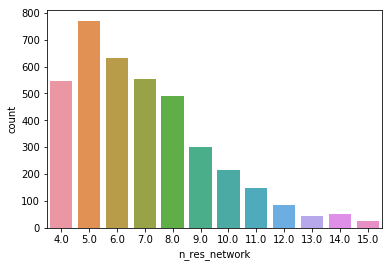

In [30]:
sns.countplot(dpicked["n_res_network"])

In [31]:
len(dpicked.description.unique())

3519

In [32]:
dcount = dpicked.groupby(by=["description"]).count()
dcount
#dcount.loc[dcount["fa_dun"] == 2]

,angle_constraint,atom_pair_constraint,dihedral_constraint,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,...,HBNet_Score,HBNet_saturation,n_hbonds,n_res_network,net_tyr10,net_tyr96,network,network_cst,tyrs,saturation
description,,,,,,,,,,,,,,,,,,,,,
0_input_0011_0002_7_0004_0010_0009,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0_input_0011_0005_10_0010_0007_0006,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0_input_0011_0005_7_0002_0005_0002,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0_input_0011_0005_7_0002_0005_0003,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0_input_0011_0005_7_0002_0005_0004,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0_input_0011_0005_7_0002_0005_0006,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0_input_0011_0005_7_0002_0005_0008,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0_input_0011_0005_7_0004_0010,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
0_input_0011_0005_7_0010_0008_0002,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


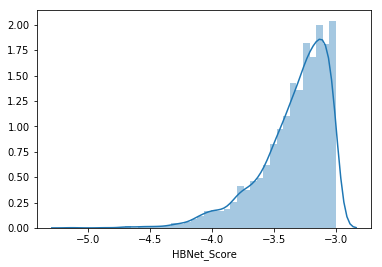

In [33]:
sns.distplot(dpicked["HBNet_Score"], bins=40)

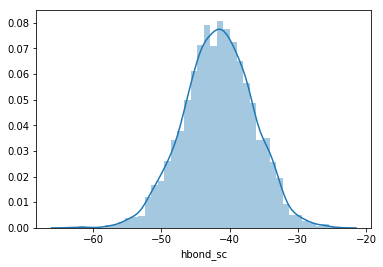

In [34]:
sns.distplot(dpicked["hbond_sc"], bins=40)

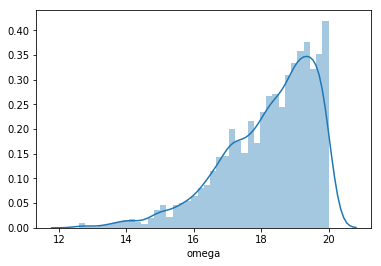

In [35]:
sns.distplot(dpicked["omega"], bins=40)

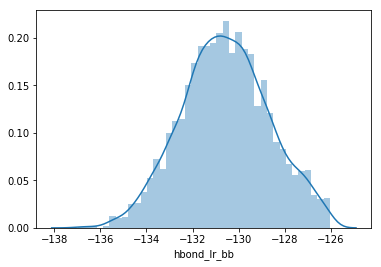

In [36]:
sns.distplot(dpicked["hbond_lr_bb"], bins=40)

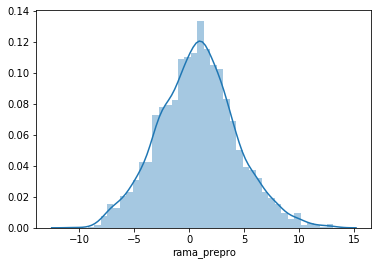

In [37]:
sns.distplot(dpicked["rama_prepro"], bins=40)

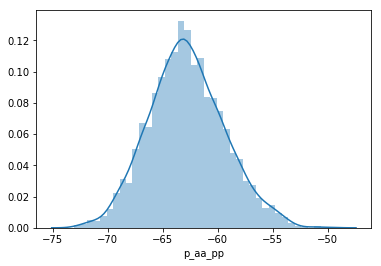

In [38]:
sns.distplot(dpicked["p_aa_pp"], bins=40)

In [39]:
dpicked.description.unique()

array(['0_input_0011_0002_7_0004_0010_0009',
       '0_input_0011_0005_10_0010_0007_0006',
       '0_input_0011_0005_7_0002_0005_0002', ...,
       '9_input_0061_0003_8_0003_0005_0007',
       '9_input_0061_0003_8_0005_0002_0004',
       '9_input_0061_0003_8_0005_0002_0009'], dtype=object)

In [40]:
from shutil import copyfile

for model in dpicked.description:
    pdb = model + ".pdb"
    final_model = model + ".pdb"
    source = "networks_analysis_B/" + pdb
    target = "round3_surf_B/" + final_model
    copyfile(source, target)

In [41]:
dpicked["network_name"] = dpicked["network_cst"].str.split("#")
print(dpicked)

       angle_constraint  atom_pair_constraint  \
12                  0.0               0.00000   
31                  0.0               0.00460   
38                  0.0               0.00000   
39                  0.0               0.00000   
41                  0.0               0.00000   
44                  0.0               0.00000   
45                  0.0               0.00000   
51                  NaN                   NaN   
53                  0.0               0.00000   
57                  0.0               0.00003   
90                  0.0               0.00000   
102                 0.0               0.00000   
108                 0.0               0.00111   
113                 0.0               0.00000   
116                 0.0               0.00000   
118                 0.0               0.00000   
119                 0.0               0.00000   
120                 0.0               0.00000   
121                 0.0               0.00503   
123                 

/Users/anastassiavorobieva/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
dpicked["tyr10_n_res"] = dpicked["n_res_network"] * dpicked["net_tyr10"]
dpicked["tyr10_n_hbond"] = dpicked["n_hbonds"] * dpicked["net_tyr10"]
dpicked["tyr96_n_res"] = dpicked["n_res_network"] * dpicked["net_tyr96"]
dpicked["tyr96_n_hbond"] = dpicked["n_hbonds"] * dpicked["net_tyr96"]

/Users/anastassiavorobieva/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/anastassiavorobieva/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/anastassiavorobieva/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [43]:
print(dpicked)

       angle_constraint  atom_pair_constraint  \
12                  0.0               0.00000   
31                  0.0               0.00460   
38                  0.0               0.00000   
39                  0.0               0.00000   
41                  0.0               0.00000   
44                  0.0               0.00000   
45                  0.0               0.00000   
51                  NaN                   NaN   
53                  0.0               0.00000   
57                  0.0               0.00003   
90                  0.0               0.00000   
102                 0.0               0.00000   
108                 0.0               0.00111   
113                 0.0               0.00000   
116                 0.0               0.00000   
118                 0.0               0.00000   
119                 0.0               0.00000   
120                 0.0               0.00000   
121                 0.0               0.00503   
123                 

In [44]:
dcst = dpicked.groupby('description')[['tyrs','n_res_network','n_hbonds','network_cst']].apply(lambda x: x.sum())
print(dcst)

                                     tyrs  n_res_network  n_hbonds  \
description                                                          
0_input_0011_0002_7_0004_0010_0009    1.0            7.0       7.0   
0_input_0011_0005_10_0010_0007_0006   1.0            7.0       7.0   
0_input_0011_0005_7_0002_0005_0002    1.0            6.0       7.0   
0_input_0011_0005_7_0002_0005_0003    1.0            6.0       6.0   
0_input_0011_0005_7_0002_0005_0004    1.0            6.0       7.0   
0_input_0011_0005_7_0002_0005_0006    1.0            6.0       7.0   
0_input_0011_0005_7_0002_0005_0008    1.0            6.0       7.0   
0_input_0011_0005_7_0004_0010         1.0            4.0       4.0   
0_input_0011_0005_7_0010_0008_0002    1.0            5.0       6.0   
0_input_0011_0005_7_0010_0008_0007    1.0            6.0       6.0   
0_input_0027_0002_4_0001_0006_0003    1.0            5.0       5.0   
0_input_0027_0002_4_0001_0006_0009    1.0            7.0       7.0   
0_input_0027_0002_4_

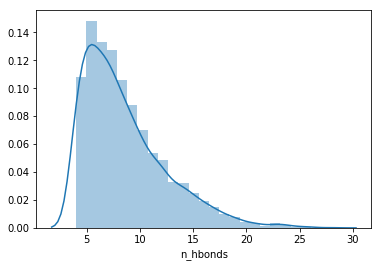

In [45]:
sns.distplot(dcst["n_hbonds"], bins=25)

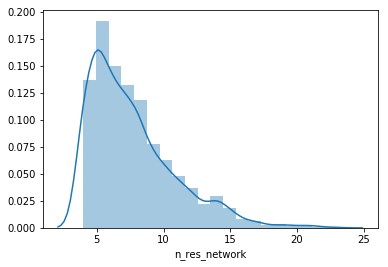

In [46]:
sns.distplot(dcst["n_res_network"], bins=20)

In [47]:
dcst.to_pickle('picked_networks.pickle')